# 사이킷런 Lab 1

# 1. boston housing 파일을 읽어들여 boston_df 데이터프레임을 만드시오. 단 목표변수의 컬럼명은 medv임.

In [2]:
import pandas as pd

boston_df = pd.read_csv('asset/boston_housing.csv')

In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# 2. 훈련데이터와 테스트데이터를 7:3으로 나누시오.

In [6]:
from sklearn.model_selection import train_test_split

x = boston_df.drop('medv', axis=1) # 또는 boston_df.iloc[:, :-1]
y = boston_df['medv'] # 또는 boston_df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=121)

# 3. DecisionTreeRegressor를 생성하여 모형을 만들고, 테스트 집합의 입력변수에 대하여 예측을 수행하시오.

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeRegressor()
dt_clf.fit(x_train, y_train)

pred = dt_clf.predict(x_test)

print(pred)

[26.2 30.1 50.  22.5 24.  30.3 21.4 19.5 22.5 44.8 20.  14.2 44.8 20.5
 12.3 10.2 21.8 13.6 22.2 50.  20.9 11.8 24.  21.6 23.7 14.8 14.9 32.
 21.6 17.4 19.3 17.2  7.2 33.8 12.7 36.5 22.4 26.4 30.1 20.  14.5 42.3
 20.  30.1 21.8 16.7 23.4 28.7 22.2 22.5 24.5 17.3 20.1 17.8 23.7 19.9
 13.8 32.  31.7 22.2 25.  21.8 19.3 19.1 22.2 25.  33.8 25.3 23.7 29.
 21.4 22.2 18.9 36.4 19.8 23.4 31.7 15.4 21.2 33.3 15.6 22.5 18.   9.6
 22.3  8.7 30.1 23.1 17.7 23.  23.  17.8 17.8 50.  10.5 23.9 14.9 23.1
 23.2 18.2 23.3 13.1]


# 4. 성능 평가를 위해 MAE, MSE, R2를 구하시오.
Hint.
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
R2 = r2_score(y_test, pred)

print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"R2: {R2}")

MAE: 2.8578431372549025
MSE: 14.440490196078434
R2: 0.8056555743588836


# 5. X축에 참값, Y축에 예측값으로 산점도를 그리시오.

/Users/sohyunwoo/.pyenv/versions/data-analysis/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sohyunwoo/.pyenv/versions/data-analysis/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sohyunwoo/.pyenv/versions/data-analysis/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sohyunwoo/.pyenv/versions/data-analysis/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


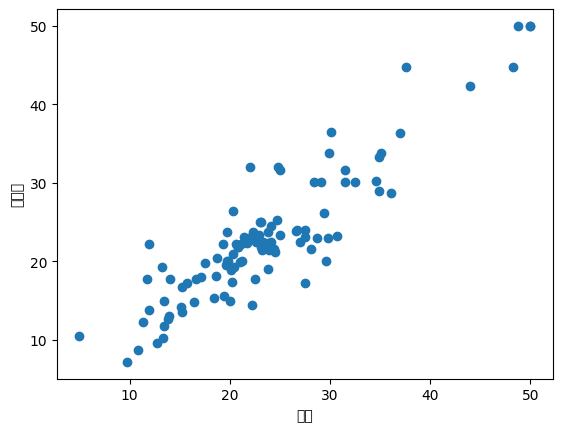

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, pred)
plt.xlabel('참값')
plt.ylabel('예측값')
plt.show()